<a href="https://colab.research.google.com/github/AzkaTsurayya/Folder-Tugas-DAA/blob/main/DAA_Pertemuan_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Analytics - Python

{1: Text(-0.18476085407227197, -0.28498369823636005, '1 NF'),
 2: Text(0.07678751623852019, -0.19816394178116337, '2 F'),
 3: Text(0.6757154935245663, 0.3066891168246749, '3 NF'),
 4: Text(-0.03270480195702578, 0.664511438040302, '4 NF'),
 5: Text(0.029353131716421108, 0.8985860054665872, '5 F'),
 6: Text(-0.5538971392830755, -0.9495086559630745, '6 F'),
 7: Text(0.1931266271765702, 0.3824769678915986, '7 F'),
 8: Text(-1.0, 0.07233896857121777, '8 NF'),
 9: Text(0.7963800266562956, -0.8919462008137824, '9 NF')}

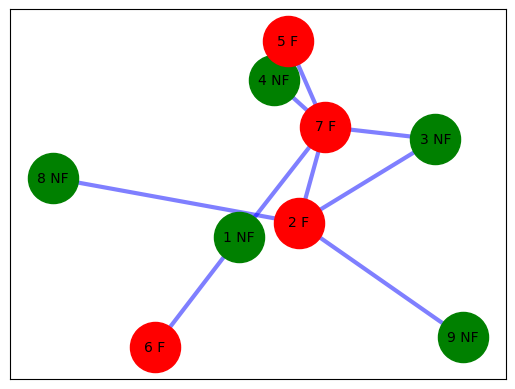

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

vertices = range(1, 10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]

G = nx.DiGraph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
pos=nx.spring_layout(G)

# Gambar Nodes dan Edges beserta labelnya menggunakan NetworkX, NF berwarna hijau, sedangkan F berwarna merah.
nx.draw_networkx_nodes(G, pos, nodelist=[1, 4, 3, 8, 9], node_color='g', node_size=1300)
nx.draw_networkx_nodes(G, pos, nodelist=[2, 5, 6, 7], node_color='r', node_size=1300)
nx.draw_networkx_edges(G, pos, edges, width=3, alpha=0.5, edge_color='b')
labels={}
labels[1]=r'1 NF'
labels[2]=r'2 F'
labels[3]=r'3 NF'
labels[4]=r'4 NF'
labels[5]=r'5 F'
labels[6]=r'6 F'
labels[7]=r'7 F'
labels[8]=r'8 NF'
labels[9]=r'9 NF'

nx.draw_networkx_labels(G, pos, labels, font_size=10)


# Neighbor & DOS values

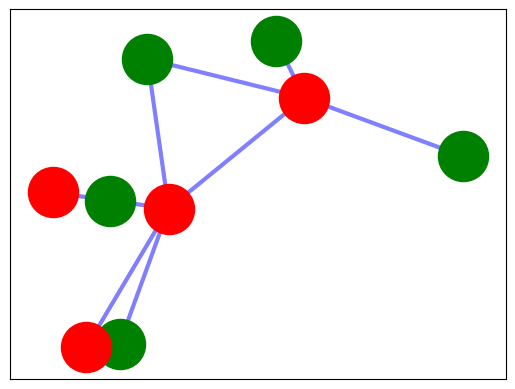

In [6]:
# Gambar Nodes dan Edges beserta labelnya menggunakan NetworkX, NF berwarna hijau, sedangkan F berwarna merah.
nx.draw_networkx_nodes(G, pos, nodelist=[1, 4, 3, 8, 9], node_color='g', node_size=1300)
nx.draw_networkx_nodes(G, pos, nodelist=[2, 5, 6, 7], node_color='r', node_size=1300)
nx.draw_networkx_edges(G, pos, edges, width=3, alpha=0.5, edge_color='b')
labels={}
labels[1]=r'1 NF'
labels[2]=r'2 F'
labels[3]=r'3 NF'
labels[4]=r'4 NF'
labels[5]=r'5 F'
labels[6]=r'6 F'
labels[7]=r'7 F'
labels[8]=r'8 NF'
labels[9]=r'9 NF'

# Calculate DOS for each node
def calculate_dos(G):
  dos = 0
  for neighbor in G.neighbors(node):
    if labels[neighbor] != labels[node]:
      dos += 1
  return dos

  dos_values = {node: calculate_dos(node) for node in G.nodes()}
  labels = {node: f'{node} ({dos_values[node]})' for node in G.nodes()}
  nx.draw_networkx_labels(G, pos, labels, font_size=10)

# DOS Normalized

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graph (jaringan sosial)
G = nx.Graph()

# Menambahkan vertices dan edges
vertices = range(1, 10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]
G.add_nodes_from(vertices)
G.add_edges_from(edges)

# Menghitung derajat setiap node
degree_values = dict(G.degree())

# DOS values (derajat tanpa normalisasi)
dos_values = {node: degree for node, degree in degree_values.items()}

# Menampilkan DOS values
print("DOS Values:")
for node, dos in dos_values.items():
  print(f"{node}: {dos}")

# Normalisasi nilai derajat ke dalam rentang 0-9
max_degree = max(degree_values.values())

# Menghitung DOS values (derajat yang dinormalisasi)
normalized_dos_values = {node: round((degree / max_degree) * 9, 2) for node, degree in degree_values.items()}

# Menampilkan DOS values (derajat yang dinormalisasi)
print("\nNormalized DOS values:")
for node, normalized_dos in normalized_dos_values.items():
  print(f"{node}: {normalized_dos}")

DOS Values:
1: 2
2: 4
3: 2
4: 2
5: 2
6: 1
7: 5
8: 1
9: 1

Normalized DOS values:
1: 3.6
2: 7.2
3: 3.6
4: 3.6
5: 3.6
6: 1.8
7: 9.0
8: 1.8
9: 1.8


# Latihan 1

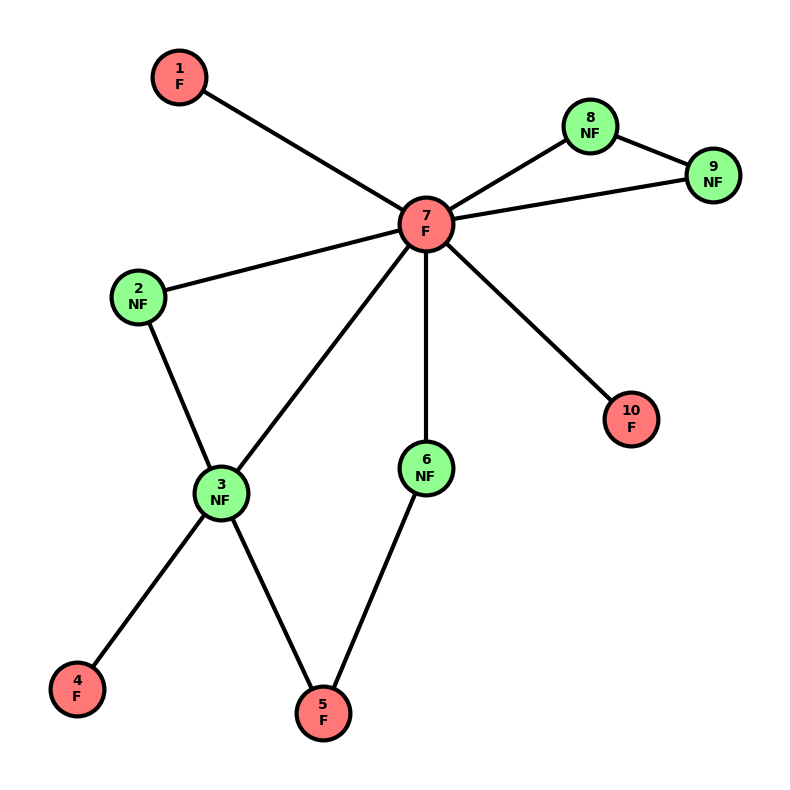

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Daftar node dan status F/NF
status = {
    1:"F", 2:"NF", 3:"NF", 4:"F", 5:"F",
    6:"NF", 7:"F", 8:"NF", 9:"NF", 10:"F"
}

# Edge
edges = [
    (1,7), (7,2), (2,3), (3,7),
    (3,4), (3,5), (7,6), (6,5),
    (7,8), (8,9), (7,9), (7,10)
]

G = nx.Graph()
G.add_edges_from(edges)

# Posisi manual
pos = {
    1:(-1.2,1.4),
    2:(-1.4,0.5),
    3:(-1.0,-0.3),
    4:(-1.7,-1.1),
    5:(-0.5,-1.2),
    6:(0.0,-0.2),
    7:(0.0,0.8),
    8:(0.8,1.2),
    9:(1.4,1.0),
    10:(1.0,0.0)
}

# Pisahkan node berdasarkan status
F_nodes  = [n for n in status if status[n] == "F"]
NF_nodes = [n for n in status if status[n] == "NF"]

plt.figure(figsize=(8,8))

# Gambar node
nx.draw_networkx_nodes(G, pos, nodelist=F_nodes, node_color="#ff7777",
                       node_size=1500, edgecolors='black', linewidths=3)

nx.draw_networkx_nodes(G, pos, nodelist=NF_nodes, node_color="#90ff90",
                       node_size=1500, edgecolors='black', linewidths=3)

# Gambar edges
nx.draw_networkx_edges(G, pos, width=3)

# Label nomor node + status (F/NF)
labels = {n: f"{n}\n{status[n]}" for n in status}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold')

plt.axis("off")
plt.tight_layout()
plt.show()


# Latihan 2

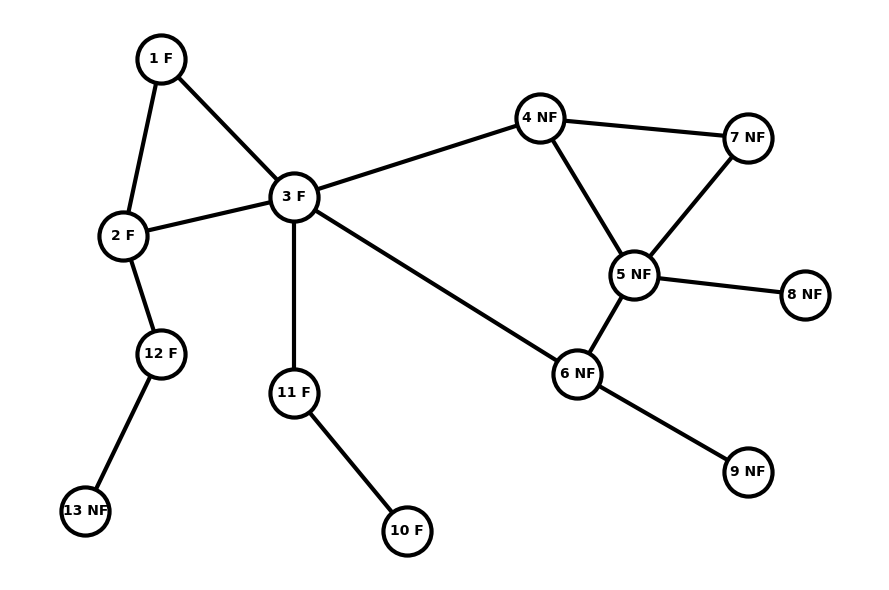

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Status F / NF
status = {
    1:"F", 2:"F", 3:"F", 4:"NF", 5:"NF", 6:"NF",
    7:"NF", 8:"NF", 9:"NF", 10:"F", 11:"F", 12:"F", 13:"NF"
}

# Edge
edges = [
    (1,3), (1,2),
    (2,3), (2,12), (12,13),
    (3,4), (3,11), (11,10),
    (3,6), (4,7), (4,5),
    (5,6), (5,7), (5,8),
    (6,9)
]

G = nx.Graph()
G.add_edges_from(edges)

# Posisi manual
pos = {
    1:(-2.0,1.5),
    2:(-2.2,0.6),
    3:(-1.3,0.8),
    12:(-2.0,0.0),
    13:(-2.4,-0.8),

    11:(-1.3,-0.2),
    10:(-0.7,-0.9),

    4:(0.0,1.2),
    5:(0.5,0.4),
    6:(0.2,-0.1),

    7:(1.1,1.1),
    8:(1.4,0.3),
    9:(1.1,-0.6)
}

plt.figure(figsize=(9,6))

# Pisahkan berdasarkan status
F_nodes  = [n for n in status if status[n] == "F"]
NF_nodes = [n for n in status if status[n] == "NF"]

# Node F = putih pinggir hitam
nx.draw_networkx_nodes(G, pos, nodelist=F_nodes,
                       node_color="white", edgecolors="black",
                       linewidths=3, node_size=1200)

# Node NF = putih pinggir hitam juga
nx.draw_networkx_nodes(G, pos, nodelist=NF_nodes,
                       node_color="white", edgecolors="black",
                       linewidths=3, node_size=1200)

# Garis tebal seperti gambar
nx.draw_networkx_edges(G, pos, width=3)

# Label node + status
labels = {n: f"{n} {status[n]}" for n in status}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight="bold")

plt.axis("off")
plt.tight_layout()
plt.show()
